<a href="https://colab.research.google.com/github/tsanifaishal/MachineLearningTasks/blob/main/6thWeekTasks/Task_6_K_Means_Clustering_M_Tsani_Faishal_Azhar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : M Tsani Faishal Azhar


NIM : 1103210143

Judul : Lecture 6 ;Model K-Means Clusstering; dataset Mall_Customer.csv

#Data Reading


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Prompt: beri kode untuk membaca dataset menjadi dataframe dari google drive

In [12]:
import pandas as pd

# Tentukan path file di Google Drive
file_path = '/content/drive/MyDrive/Dataset/Mall_Customers.csv'

# Baca dataset menjadi DataFrame
df = pd.read_csv(file_path)

#Menampilkan informasi atau contoh data dari DataFrame
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#Preprocessing

Prompt : Beri kode untuk drop fitur CustomerID

Prompt: beri kode if else dimana jika dalam dataset masih terdapat kolom "CustomerID" maka hapus kolom tersebut dan jika sudah tidak ada maka tidak apa apa

In [18]:
# Periksa apakah kolom "CustomerID" ada dalam DataFrame
if 'CustomerID' in df.columns:
    # Jika kolom "CustomerID" ada, maka hapus kolom tersebut
    df = df.drop(columns=['CustomerID'])
    print("Kolom 'CustomerID' telah dihapus.")
else:
    # Jika kolom "CustomerID" tidak ada, tidak perlu melakukan apa-apa
    print("Tidak ada kolom 'CustomerID' dalam DataFrame.")

# Tampilkan DataFrame setelah menjatuhkan kolom
print(df.info())


Tidak ada kolom 'CustomerID' dalam DataFrame.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None


Prompt : Beri kode untuk mengubah fitur Genre menjadi Gender

In [19]:
# Mengubah nama kolom "Genre" menjadi "Gender"
df = df.rename(columns={'Genre': 'Gender'})

# Tampilkan DataFrame setelah mengubah nama kolom
print(df)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


Proses K-Means

In [20]:
# Encoding kolom 'Gender'
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

print(df)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         0   19                  15                      39
1         0   21                  15                      81
2         1   20                  16                       6
3         1   23                  16                      77
4         1   31                  17                      40
..      ...  ...                 ...                     ...
195       1   35                 120                      79
196       1   45                 126                      28
197       0   32                 126                      74
198       0   32                 137                      18
199       0   30                 137                      83

[200 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

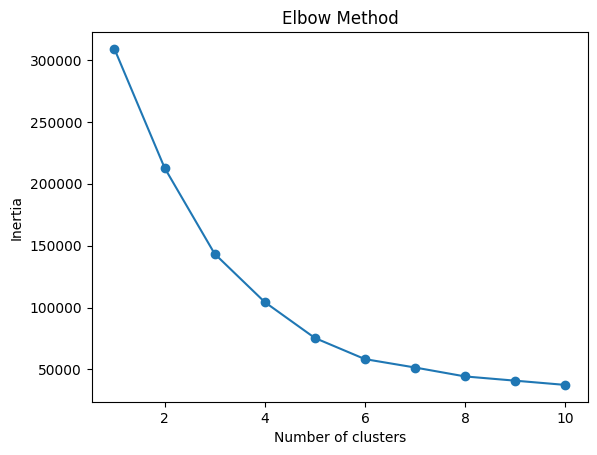

In [23]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List untuk menyimpan inertia
inertia = []

# Coba jumlah cluster dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [24]:
# Melatih mode K-Means dengan 5 klaster
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

# Menambahkan label klaster ke DataFrame
df['Cluster'] = kmeans.labels_

#Menampilkan hasil klaster
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,2
1,0,21,15,81,0
2,1,20,16,6,2
3,1,23,16,77,0
4,1,31,17,40,2
...,...,...,...,...,...
195,1,35,120,79,3
196,1,45,126,28,4
197,0,32,126,74,3
198,0,32,137,18,4


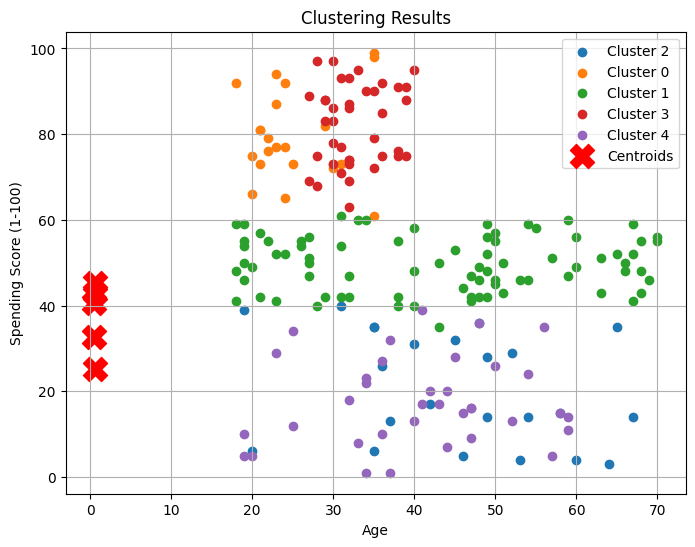

In [25]:
# Visualisasi hasil klasterisasi
plt.figure(figsize=(8, 6))

# Plot data untuk setiap klaster
for cluster in df['Cluster'].unique():
    plt.scatter(df[df['Cluster'] == cluster]['Age'], df[df['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}')

# Plot centroid klaster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Results')
plt.legend()
plt.grid(True)
plt.show()

Mengevaluasi k-means, melihat Silhouette Score dari masing masing jumlah klaster

In [26]:
from sklearn.metrics import silhouette_score

# List untuk menyimpan skor Silhouette
silhouette_scores = []

# Coba jumlah cluster dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan skor Silhouette
for k, score in enumerate(silhouette_scores, start=2):
    print(f"Silhouette Score for {k} clusters: {score}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for 2 clusters: 0.2928228263024929
Silhouette Score for 3 clusters: 0.38440142073778305
Silhouette Score for 4 clusters: 0.40604360741592743
Silhouette Score for 5 clusters: 0.44483206672196046
Silhouette Score for 6 clusters: 0.4523222182435576
Silhouette Score for 7 clusters: 0.4384498626004864
Silhouette Score for 8 clusters: 0.4295092541004709
Silhouette Score for 9 clusters: 0.41420724434468215
Silhouette Score for 10 clusters: 0.3765082702083306


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
